In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()
features = digits.data
target = digits.target

standardizer = StandardScaler()

logit = LogisticRegression()

pipeline = make_pipeline(standardizer, logit)

kf = KFold(n_splits = 10, shuffle=True, random_state=1)

cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=kf,
                            scoring="accuracy",
                            n_jobs=-1)

cv_results.mean()

0.964931719428926

In [2]:
from sklearn.model_selection import train_test_split

features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=1)

standardizer.fit(features_train)

features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

pipeline = make_pipeline(standardizer, logit)

cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=kf,
                            scoring="accuracy",
                            n_jobs=-1)

In [3]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

boston = load_boston()

features, target = boston.data, boston.target

features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0)

dummy = DummyRegressor(strategy='mean')

dummy.fit(features_train, target_train)

dummy.score(features_test, target_test)

-0.001119359203955339

In [4]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(features_train, target_train)

ols.score(features_test, target_test)

0.6354638433202129

In [5]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

features,target = iris.data,iris.target
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0)

dummy = DummyClassifier(strategy='uniform',random_state=1)

dummy.fit(features_train, target_train)

dummy.score(features_test,target_test)

0.42105263157894735

In [6]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(features_train,target_train)

classifier.score(features_test,target_test)

C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9736842105263158

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 10000,
                          n_features = 3,
                          n_informative = 3,
                          n_redundant = 0,
                          n_classes = 2,
                          random_state = 1)

logit = LogisticRegression()

cross_val_score(logit, X, y, scoring="accuracy")

C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95170966, 0.9580084 , 0.95558223])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

iris = datasets.load_iris()

features = iris.data
target = iris.target

class_names = iris.target_names
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=1)

classifier = LogisticRegression()

target_predicted = classifier.fit(features_train, target_train).predict(features_test)
matrix = confusion_matrix(target_test, target_predicted)

dataframe = pd.DataFrame(matrix, index=class_names, columns = class_names)

sns.heatmap(dataframe, annot = True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
#plt.show()

from sklearn.metrics import classification_report
print(classification_report(target_test,
                           target_predicted,
                           target_names = class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.62      0.77        16
   virginica       0.60      1.00      0.75         9

   micro avg       0.84      0.84      0.84        38
   macro avg       0.87      0.88      0.84        38
weighted avg       0.91      0.84      0.84        38



C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

features, target = make_regression(n_samples = 100,
                                  n_features = 3,
                                  n_informative = 3,
                                  n_targets = 1,
                                  noise = 50,
                                  coef = False,
                                  random_state = 1)

ols = LinearRegression()

cross_val_score(ols, features, target, scoring = 'neg_mean_squared_error')

C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([-1718.22817783, -3103.4124284 , -1377.17858823])

In [10]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples = 1000,
                        n_features = 10,
                        centers = 2,
                        cluster_std = 0.5,
                        shuffle = True,
                        random_state = 1)

model = KMeans(n_clusters=2, random_state = 0).fit(features)

target_predicted = model.labels_

silhouette_score(features, target_predicted)

0.8916265564072142

In [11]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

features, target = make_regression(n_samples = 100,
                                  n_features = 3,
                                  random_state = 1)

features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.10,random_state=1)

def custom_metric(target_test, target_predicted):
    r2 = r2_score(target_test, target_predicted)
    return r2

score = make_scorer(custom_metric, greater_is_better = True)

classifier = Ridge()

model = classifier.fit(features_train,target_train)

score(model, features_test, target_test)

0.9997906102882058

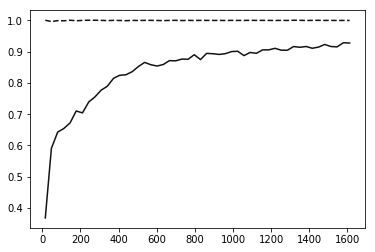

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits()

features, target = digits.data, digits.target

train_sizes,train_scores,test_scores = learning_curve(RandomForestClassifier(),
                                                     features,
                                                     target,
                                                     cv=10,
                                                     scoring='accuracy',
                                                     n_jobs=-1,
                                                     train_sizes=np.linspace(0.01,1.0,50))

train_mean = np.mean(train_scores, axis=1)
train_std= np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std= np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',color="#111111", label="Training score")
plt.plot(train_sizes, test_mean,color="#111111", label="Cross-validation score")

plt.show()

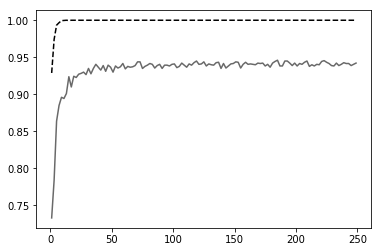

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

digits = load_digits()

features, target = digits.data, digits.target

param_range = np.arange(1,250,2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                            features,
                                            target,
                                            param_name = "n_estimators",
                                            param_range=param_range,
                                            cv=3,
                                            scoring="accuracy",
                                            n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std= np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std= np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, '--',color="black", label="Training score")
plt.plot(param_range, test_mean,color="dimgrey", label="Cross-validation score")

plt.show()